In [20]:
!pip install datascience
import pandas as pd
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [4]:
pwd

'/Users/willfurtado/Documents/GitHub/dss-2019'

# Data Table

In [5]:
df = pd.read_csv('/Users/willfurtado/Documents/GitHub/dss-2019/Data Frames/With Lengths.csv')
articles = Table.from_df(df).relabeled('headline length','length')
articles.show(3)
headlines = articles.column('headline')

is_sarcastic,headline,article_link,length
1,thirtysomething scientists unveil doomsday clock of hair ...,https://www.theonion.com/thirtysomething-scientists-unve ...,61
0,dem rep. totally nails why congress is falling short on ...,https://www.huffingtonpost.com/entry/donna-edwards-inequ ...,79
0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9- ...,49


In [6]:
word_count = [len(headline.split()) for headline in headlines]
articles = articles.with_column('word count',word_count)
articles

is_sarcastic,headline,article_link,length,word count
1,thirtysomething scientists unveil doomsday clock of hair ...,https://www.theonion.com/thirtysomething-scientists-unve ...,61,8
0,dem rep. totally nails why congress is falling short on ...,https://www.huffingtonpost.com/entry/donna-edwards-inequ ...,79,13
0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9- ...,49,7
1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-li ...,52,8
1,mother comes pretty close to using word 'streaming' corr ...,https://www.theonion.com/mother-comes-pretty-close-to-us ...,61,9
0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-inheritanc ...,20,3
0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to-file-your ...,42,9
1,richard branson's global-warming donation nearly as much ...,https://www.theonion.com/richard-bransons-global-warming ...,88,13
1,shadow government getting too large to meet in marriott ...,https://politics.theonion.com/shadow-government-getting- ...,73,12
0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6IXxhm,34,6


In [7]:
## Subset of articles table where all rows are sarcastic

sarcasm = articles.where('is_sarcastic', 1)
sarcasm

is_sarcastic,headline,article_link,length,word count
1,thirtysomething scientists unveil doomsday clock of hair ...,https://www.theonion.com/thirtysomething-scientists-unve ...,61,8
1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-li ...,52,8
1,mother comes pretty close to using word 'streaming' corr ...,https://www.theonion.com/mother-comes-pretty-close-to-us ...,61,9
1,richard branson's global-warming donation nearly as much ...,https://www.theonion.com/richard-bransons-global-warming ...,88,13
1,shadow government getting too large to meet in marriott ...,https://politics.theonion.com/shadow-government-getting- ...,73,12
1,ford develops new suv that runs purely on gasoline,https://www.theonion.com/ford-develops-new-suv-that-runs ...,50,9
1,area boy enters jumping-and-touching-tops-of-doorways phase,https://www.theonion.com/area-boy-enters-jumping-and-tou ...,59,5
1,area man does most of his traveling by gurney,https://local.theonion.com/area-man-does-most-of-his-tra ...,45,9
1,guard in video game under strict orders to repeatedly pa ...,https://www.theonion.com/guard-in-video-game-under-stric ...,82,14
1,secret service agent not so secret about being david ala ...,https://www.theonion.com/secret-service-agent-not-so-sec ...,67,12


In [8]:
## Subset of articles table where all rows are NOT sarcastic

not_sarcasm = articles.where('is_sarcastic', 0).drop('is_sarcastic')
not_sarcasm

headline,article_link,length,word count
dem rep. totally nails why congress is falling short on ...,https://www.huffingtonpost.com/entry/donna-edwards-inequ ...,79,13
eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9- ...,49,7
my white inheritance,https://www.huffingtonpost.com/entry/my-white-inheritanc ...,20,3
5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to-file-your ...,42,9
lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6IXxhm,34,6
this lesbian is considered a father in indiana (and an a ...,https://www.huffingtonpost.com/entry/this-lesbian-is-con ...,75,14
amanda peet told her daughter sex is 'a special hug',https://www.huffingtonpost.com/entry/amanda-peet-told-he ...,52,10
what to know regarding current treatments for ebola,https://www.huffingtonpost.com/entry/what-to-know-regard ...,51,8
chris christie suggests hillary clinton was to blame for ...,https://www.huffingtonpost.com/entry/chris-christie-hill ...,107,16
uber ceo travis kalanick stepping down from trump econom ...,https://www.huffingtonpost.com/entry/uber-ceo-travis-kal ...,75,11


# Table Specifications: Length

Below are several parameters of the length of the headlines (both sarcastic and non-sarcastic)

In [9]:
## The maximum length of all headlines

max(articles.column('length'))

926

In [10]:
## The longest headline (maximum)

articles.sort('length', descending = True).column('headline').item(0)

'hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet'

In [11]:
## The longest 'Non Sarcastic' headline

not_sarcasm.sort('length', descending = True).column('headline').item(0)

'occasionally you realize someone you thought was a dear friend is actually a foe, their true character finally revealed. but how do you forgive the unforgivable? here are my 10 steps to handling betrayal with elegance and grace.'

In [12]:
## The minimum length of all headlines

min(articles.column('length'))

7

In [13]:
def five_figure_summary(table):
    """" Returns an array containing the five figure summary of the given table"""
    length_array = table.column('length')
    minimum = min(length_array)
    first = np.quantile(length_array,0.25)
    middle = np.quantile(length_array, 0.5)
    third = np.quantile(length_array, 0.75)
    maximum = max(length_array)
    return make_array(minimum,first,middle,third,maximum)

## Permutation Test: Length of Headline

#### The below permutation test will use A/B testing to determine if length can be considered a factor when testing for sarcasm. By randomly shuffling the lengths and reassigning a sarcasm score, we can see if our discovery that sarcastic headlines are inherently longer is statistically sound.

*Null Hypothesis: There is no distinct relation between the length of headline and sarcasm; if we shuffled the labels, our average would be similar to our observed.*

*Alternative Hypothesis: There is a relationship between headline length and sarcasm.*

*Test Statistic: The difference of averages between each group (A and B)*

In [14]:
sarcasm_and_length = articles.select('is_sarcastic','length')
sarcasm_and_length

is_sarcastic,length
1,61
0,79
0,49
1,52
1,61
0,20
0,42
1,88
1,73
0,34


In [15]:
def difference_of_means(table, label, group_label):
    """Takes a table, the label of an integer column and a label to group by; Returns the difference of mean """
    #table with the two relevant columns
    reduced = table.select(label,group_label)
    
    #table containing group means
    means_table = reduced.group(group_label, np.average)
    
    #array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [16]:
observed_difference = difference_of_means(sarcasm_and_length,'length','is_sarcastic')
observed_difference

5.772385416564184

In [17]:
def one_simulated_difference(table,label,group_label):
    """Simulates one value of the difference of means"""
    #array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    #table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table,label, 'Shuffled Label')

In [18]:
differences = make_array()

for i in np.arange(1000):
    simulated_difference = one_simulated_difference(sarcasm_and_length,'length','is_sarcastic')
    differences = np.append(differences,simulated_difference)

Observed Difference: 5.772385416564184


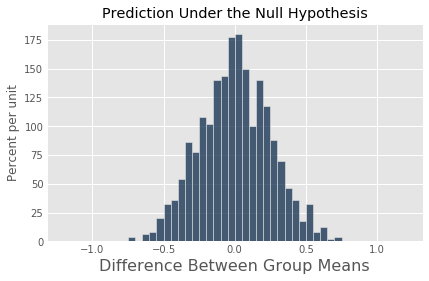

In [21]:
Table().with_column('Difference Between Group Means', differences).hist(bins = np.arange(-1.2,1.21,0.05))
print('Observed Difference:', observed_difference)
plt.title('Prediction Under the Null Hypothesis');

In [22]:
# Calculates the probability of getting a difference of means equal to or more in the direction 
# of the alternative(higher) than the observed test statistic

p_value = np.count_nonzero(differences >= observed_difference) / len(differences)
p_value

0.0

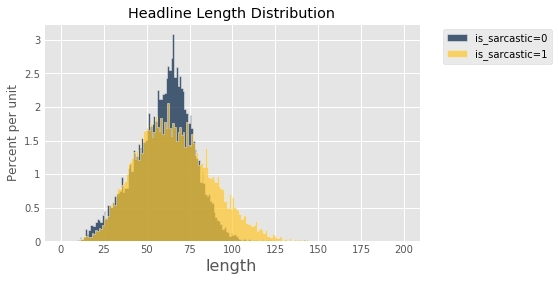

In [23]:
articles.hist('length', bins = np.arange(0,200,1), group = 'is_sarcastic')
plt.title('Headline Length Distribution');